In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = "white")
%matplotlib inline

In [46]:
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")

## Distribuição de Veículos com base no Ano de Registro

<AxesSubplot:ylabel='Frequency'>

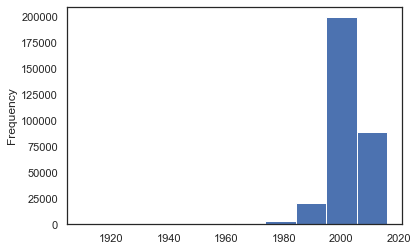

In [47]:
# Crie um Plot com a Distribuição de Veículos com base no Ano de Registro
df['yearOfRegistration'].plot.hist()

## Variação da faixa de preço pelo tipo de veículo

{'whiskers': [<matplotlib.lines.Line2D at 0x11cba9a60d0>,
 'caps': [<matplotlib.lines.Line2D at 0x11cba9a67f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11cbbe51d00>],
 'medians': [<matplotlib.lines.Line2D at 0x11cba9a6f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x11cba99c310>],
 'means': []}

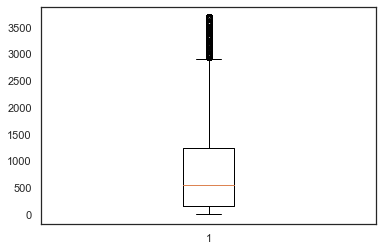

In [48]:
indexes=list(pd.unique(df['vehicleType']))
df2=df.loc[df['vehicleType']==indexes[0],'price'].values
plt.boxplot(df2)

## Contagem total de veículos conforme o tipo de véiculo

<AxesSubplot:xlabel='vehicleType'>

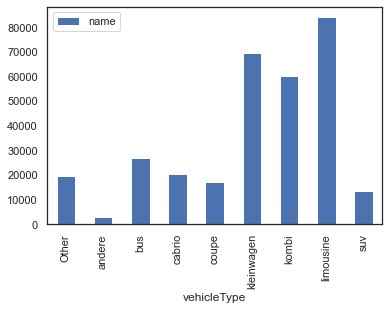

In [49]:
df3=df.groupby('vehicleType').count()
df3.plot(y='name',kind='bar')

## Número de veículos pertencentes a cada marca

<AxesSubplot:ylabel='brand'>

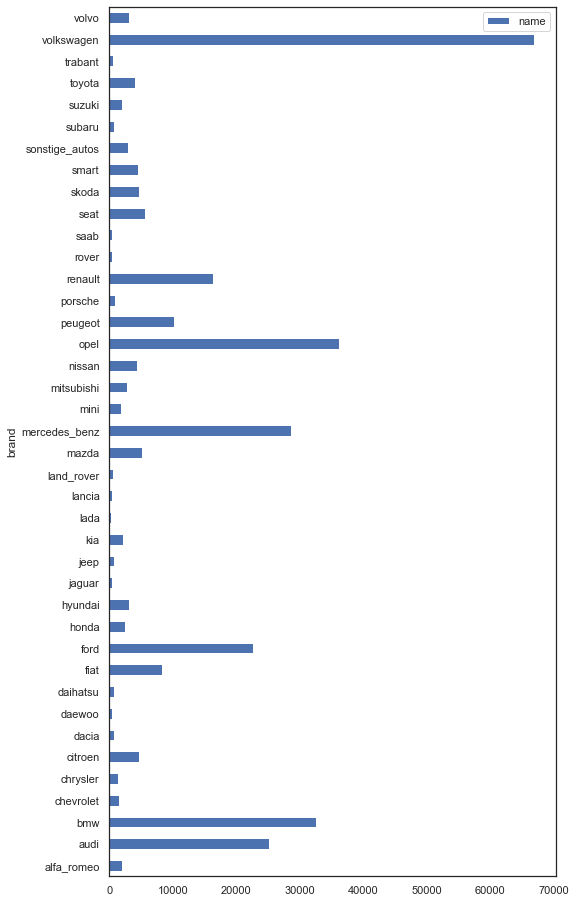

In [50]:
df4 = df[['name','brand']].groupby('brand').count()
df4.plot.barh(figsize=(8,16))

## Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

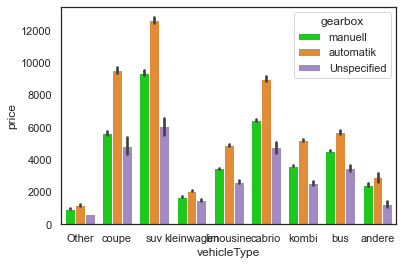

In [51]:
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="vehicleType", y="price",hue="gearbox", palette=colors, data=df)

## Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio

In [52]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',
       'yearOfCreation', 'yearCrawled', 'monthOfCreation', 'monthCrawled',
       'NoOfDaysOnline', 'NoOfHrsOnline', 'yearsOld', 'monthsOld'],
      dtype='object')

<AxesSubplot:xlabel='fuelType', ylabel='price'>

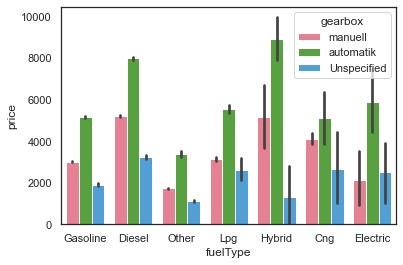

In [53]:
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="fuelType", y="price",hue="gearbox", palette='husl', data=df)

## Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio

<AxesSubplot:xlabel='vehicleType', ylabel='powerPS'>

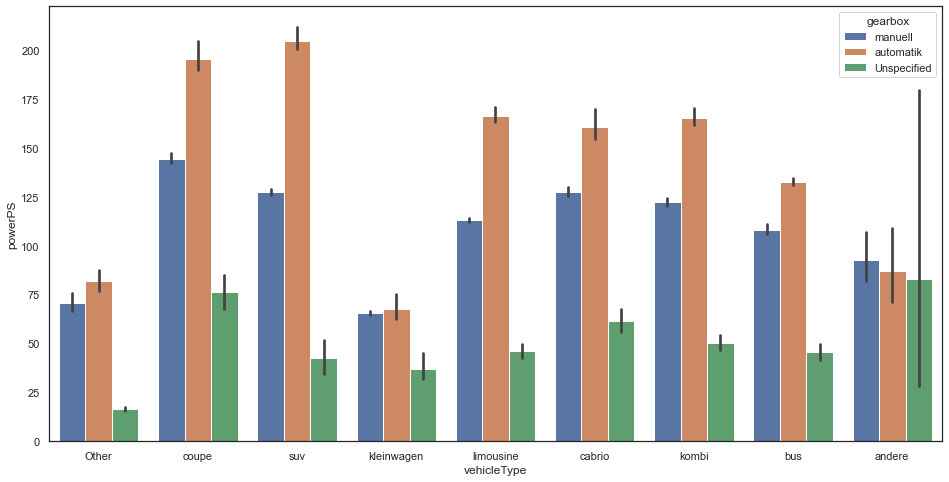

In [54]:
plt.figure(figsize=(16,8))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="vehicleType", y="powerPS",hue="gearbox", data=df)

## Calcule a média de preço por marca e por veículo

In [58]:
df6=pd.DataFrame()
auxlist=[]
indexBrand=df["brand"].unique()
for i in indexBrand:    
    df5=pd.DataFrame(df[df['brand']==i][['vehicleType','price']])
    df5=df5.groupby('vehicleType').mean().reset_index()
    for nBrand in range(len(df5['vehicleType'])):
        auxlist.append(i)
    df6=df6.append(df5)

df6['brand']=auxlist
df6


,vehicleType,price,brand
0,Other,897.449959,volkswagen
1,andere,2597.288856,volkswagen
2,bus,5881.839891,volkswagen
3,cabrio,5784.496482,volkswagen
4,coupe,8014.078218,volkswagen
...,...,...,...
3,cabrio,2500.000000,lada
4,kleinwagen,1058.166667,lada
5,kombi,1278.000000,lada
6,limousine,2618.857143,lada


## Preço médio de um veículo por marca e por tipo de veículo

In [72]:
tri = df6.pivot('brand','vehicleType','price')
tri


vehicleType,Other,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv
brand,,,,,,,,,
alfa_romeo,669.805556,962.500000,NaN,7035.727778,5265.458874,1867.865248,3312.968680,2600.240964,0.000000
audi,1012.599251,2685.311828,3485.000000,9655.285628,11242.325869,2582.206074,5442.982216,3829.821096,18644.243902
bmw,896.748086,1720.388393,4064.000000,8613.779584,6375.995227,1575.313070,5030.383186,4838.119115,12868.142412
chevrolet,1250.135593,3059.590909,5188.013699,10590.294118,9991.757895,2588.882239,4143.609524,4944.031818,9613.550505
chrysler,915.701299,2919.714286,2395.083333,4160.719665,8194.000000,1666.444444,3930.567686,3191.585455,5888.391304
citroen,912.367647,2248.972727,4036.490718,4536.408696,2695.552632,2274.683580,3101.815182,3379.148256,10810.540541
dacia,1674.875000,3560.000000,8370.729167,NaN,NaN,3276.289474,4166.642857,3260.578431,9761.972093
daewoo,664.204082,993.800000,1262.777778,900.000000,428.625000,1110.324627,816.340426,983.981308,1900.000000
daihatsu,614.675676,1075.000000,1201.500000,7761.000000,NaN,1402.864245,3420.294118,3329.543478,2066.918367


<AxesSubplot:xlabel='vehicleType', ylabel='brand'>

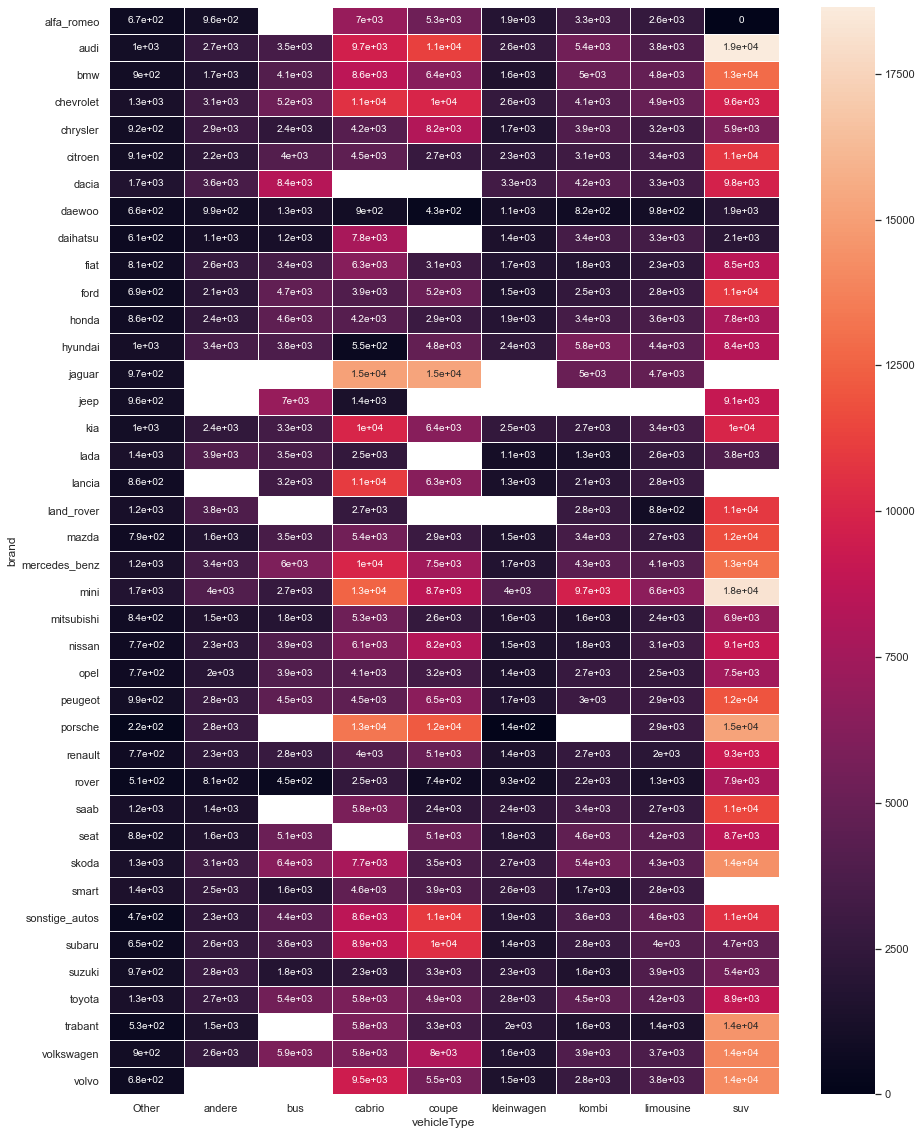

In [76]:
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,annot=True, ax=ax)